- Importing pandas and uploading the CSV file  
- Checking the shape of the dataset  
- Checking for missing values  

In [1]:
import pandas as pd
df = pd.read_csv('/content/Telco_customer_churn.csv')
df.head()

print("Number of rows and columns:",df.shape)

# checking for null values
df.isnull().sum()


Number of rows and columns: (7043, 52)


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


 - Handling null values
  - Replaced missing values in the Churn Reason column with its most frequent value (mode) to retain data consistency.
  
  - Replaced missing values in the Offer column with 'None', assuming these customers were not provided with any offer.

In [2]:
# replacing null values
mode_val = df['Churn Reason'].mode()[0]
df['Churn Reason'] = df['Churn Reason'].fillna(mode_val)

x = df['Offer'].isna()
df.loc[x,'Offer'] = 'None'


## Churn Count Analysis

- Calculated the number of customers who have **churned** and those who have **not churned** using `value_counts()`.
- Converted the result into a DataFrame and visualized it using a **bar plot**.
- This visualization helps us understand the **distribution of the target variable** (Churn).
- It shows whether the dataset is **balanced or imbalanced**, which is crucial for model training and evaluation later.


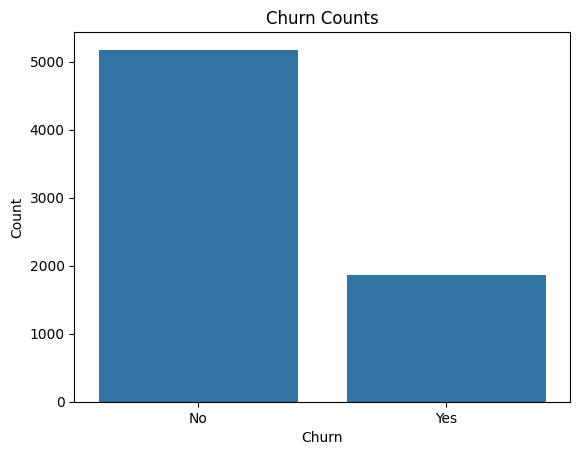

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


# churn status count
churn_counts = df['Churn'].value_counts()
churn_df = churn_counts.to_frame().reset_index()
churn_df.columns = ['Churn', 'Count']
sns.barplot(x='Churn',y='Count', data=churn_df)
plt.title('Churn Counts')
plt.show()

###  Churn Analysis by Contract Type

- Grouped customers based on their **contract type** (Month-to-month, One year, Two year) and calculated the number of customers who churned and who didn’t.
- Visualized this using a **bar plot** to compare **churn counts** across contract types.
- Also plotted a **normalized stacked bar chart** to show the **churn rate (%)** per contract type for better comparison.
- Insight: Customers with **month-to-month contracts** have the **highest churn rate**, while those with **longer-term contracts** are more likely to stay, indicating stronger customer retention with long-term commitments.


         Contract Churn  count
0  Month-to-month    No   2220
1  Month-to-month   Yes   1655
2        One year    No   1307
3        One year   Yes    166
4        Two year    No   1647
5        Two year   Yes     48


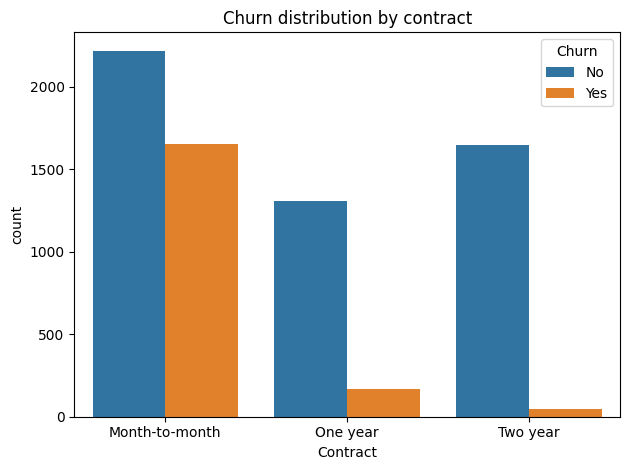

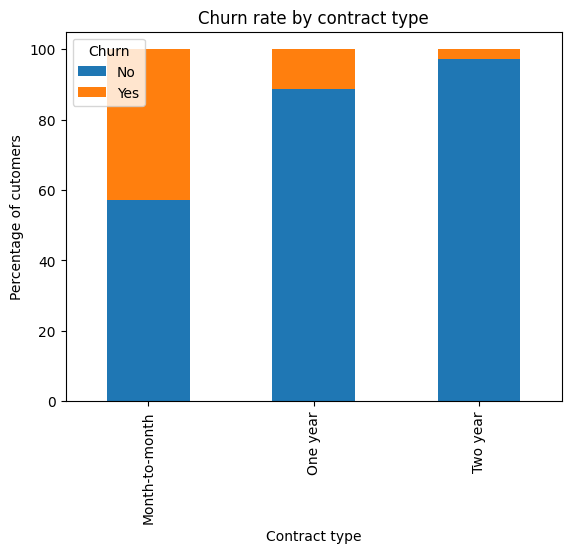

In [4]:
# churn by contract type
contract_type = df.groupby('Contract')['Churn'].value_counts()
contract_type = contract_type.to_frame().reset_index()
contract_type.columns = ['Contract','Churn','count']
print(contract_type)

sns.barplot(data=contract_type,x='Contract',y='count',hue='Churn')
plt.title('Churn distribution by contract')
plt.tight_layout()
plt.show()

contract_rate=df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()*100

contract_rate.plot(kind='bar', stacked=True)
plt.title('Churn rate by contract type')
plt.xlabel('Contract type')
plt.ylabel('Percentage of cutomers')
plt.show()

### Churn Analysis by Monthly Charges

- Grouped customers into charge bands: `< $40`, `$40–$60`, `$60–$100`, and `> $100`.
- Visualized **churn count** for each group using a grouped barplot.
- Used a **boxplot** to observe the distribution of monthly charges across churned vs non-churned customers.
- Plotted a **normalized (percentage) bar chart** to show **churn rate per charge group**.

### 🔍 Insight:
- Customers with **monthly charges greater than $60** are significantly **more likely to churn**.
- Those paying **less than 40** have the **lowest churn rate**.
- This indicates pricing may be a key factor in customer retention.



  Monthly Charges Group Churn  count
0          less than 40    No   1624
1          less than 40   Yes    214
2                 40-60    No    804
3                 40-60   Yes    276
4                60-100    No   2097
5                60-100   Yes   1126
6         more than 100    No    649
7         more than 100   Yes    253


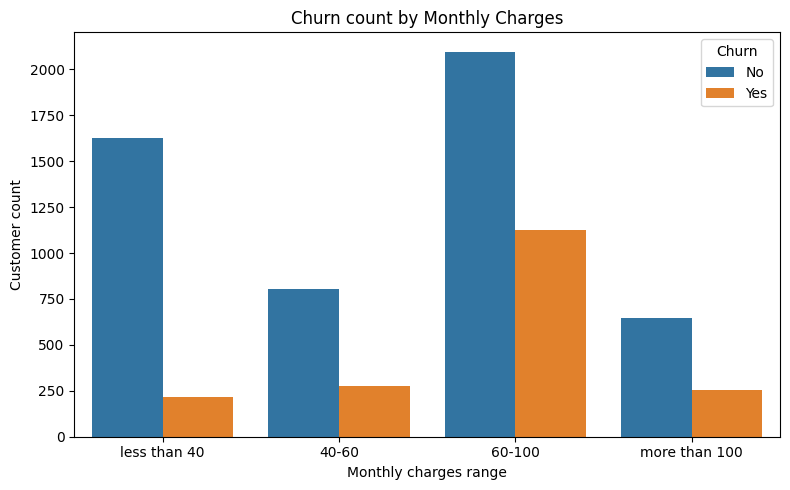

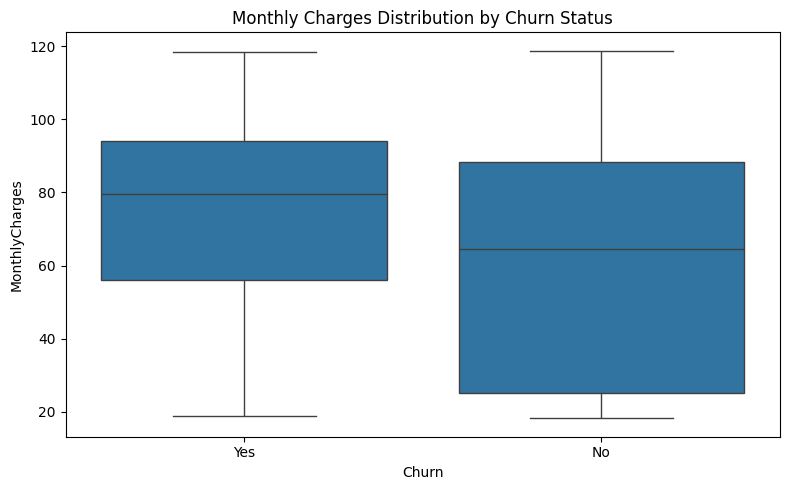

<Figure size 800x500 with 0 Axes>

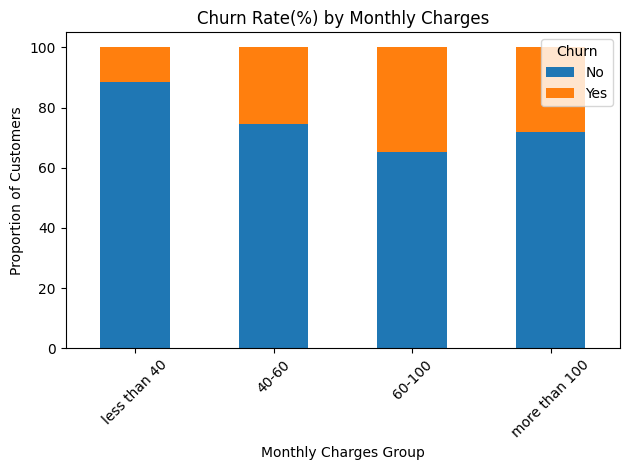

In [5]:
# churn analysis by Monthly charges
bins = [-float('inf'),40,60,100,float('inf')]
labels = ["less than 40","40-60","60-100","more than 100"]
df['Monthly Charges Group']=pd.cut(df['MonthlyCharges'],bins=bins, labels=labels)
monthly_charges_churn = df.groupby(['Monthly Charges Group'],observed=False)['Churn'].value_counts()

monthly_charges_churn = monthly_charges_churn.to_frame().reset_index()
print(monthly_charges_churn)

plt.figure(figsize=(8,5))
sns.barplot(data=monthly_charges_churn,x="Monthly Charges Group",y="count", hue="Churn")
plt.title('Churn count by Monthly Charges')
plt.xlabel('Monthly charges range')
plt.ylabel('Customer count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges Distribution by Churn Status")
plt.tight_layout()
plt.show()

rate_df = df.groupby('Monthly Charges Group',observed=False)['Churn'].value_counts(normalize=True).unstack()*100

plt.figure(figsize=(8,5))
rate_df.plot(kind='bar',stacked=True)
plt.title('Churn Rate(%) by Monthly Charges')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📅 Churn Analysis by Tenure

- Binned customers into tenure ranges: **<12 months**, **12–24 months**, **24–48 months**, and **>48 months**.
- Visualized churn distribution using a grouped barplot.
- Used a boxplot to understand how tenure values are distributed across churn status.

### 🔍 Insight:
- Customers with **less than 12 months of tenure** are **much more likely to churn**.
- As tenure increases, the likelihood of churn **significantly decreases**, indicating that longer customer relationships result in stronger retention.
- However, there are a **few outliers** — even customers with **70+ months of tenure** have churned, suggesting occasional exceptions due to other influencing factors.


  Tenure groups Churn  count
0  Less than 12    No   1149
1  Less than 12   Yes   1037
2         12-24    No    730
3         12-24   Yes    294
4         24-48    No   1269
5         24-48   Yes    325
6  More than 48    No   2026
7  More than 48   Yes    213


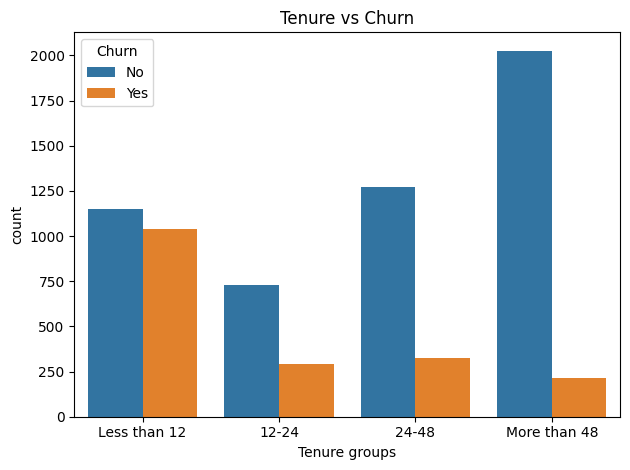

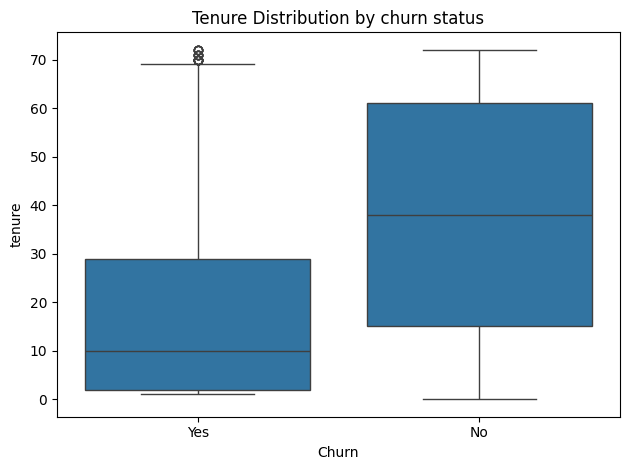

In [6]:
# tenure vs churn
bins=[-float('inf'),12,24,48,float('inf')]
labels = ['Less than 12','12-24','24-48','More than 48']

df['Tenure groups']=pd.cut(df['tenure'],bins=bins,labels=labels)

tenure_groups = df.groupby('Tenure groups',observed=False)['Churn'].value_counts()
tenure_groups = tenure_groups.to_frame().reset_index()
print(tenure_groups)

sns.barplot(data=tenure_groups,x="Tenure groups", y="count", hue="Churn")
plt.title('Tenure vs Churn')
plt.tight_layout()
plt.show()

sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure Distribution by churn status')
plt.tight_layout()
plt.show()

### 🎯 Offers vs Churn and Customer Lifetime Value (CLTV)

#### 1️⃣ Churn Count by Offer
- The **highest churn** occurred among customers who received **no offer**.
- Among those who did receive offers, **Offer E** had the highest number of churned customers.
- **Offer A** showed the **lowest churn count**, suggesting it may be effective in retaining customers.

#### 2️⃣ CLTV Distribution by Offer
- Customers who received **Offer A** have the **highest median CLTV**, indicating they bring more long-term value.
- Offers B, C, D, and E attract customers with **lower or moderate CLTV**.
- **Offer B** shows a wide range of CLTV, but includes a noticeable number of **low-value outliers**.

#### 🔍 Insight:
- **Offer A** seems to be the most effective offer in terms of **both retention and customer value**.
- Marketing efforts can be optimized by promoting **Offer A** more broadly.
- Other offers may need reevaluation or redesign, especially **Offer E**, which shows high churn despite being offered.



      Offer Churn  count
0      None    No   2826
1      None   Yes   1051
2   Offer A    No    485
3   Offer A   Yes     35
4   Offer B    No    723
5   Offer B   Yes    101
6   Offer C    No    320
7   Offer C   Yes     95
8   Offer D    No    441
9   Offer D   Yes    161
10  Offer E   Yes    426
11  Offer E    No    379


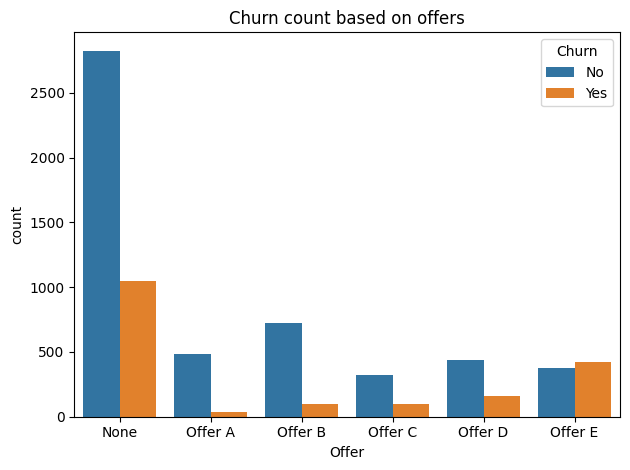

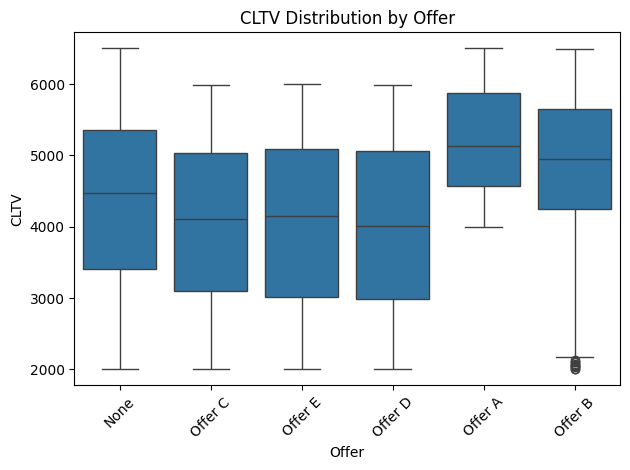

In [7]:
# offer vs churn
offer_counts = df.groupby('Offer')['Churn'].value_counts()
offer_counts = offer_counts.to_frame().reset_index()
print(offer_counts)

sns.barplot(data=offer_counts,x="Offer",y="count",hue="Churn")
plt.title('Churn count based on offers')
plt.tight_layout()
plt.show()


sns.boxplot(data=df, x='Offer', y='CLTV')
plt.title('CLTV Distribution by Offer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### 🌐 Unlimited Data vs Churn

#### 1️⃣ Churn Count by Data Plan
- Customers with **Unlimited Data** are more in number and have a **higher total churn count** compared to those without.
- However, raw count alone does not give a complete picture due to the difference in group sizes.

#### 2️⃣ Churn Rate by Data Plan
- When comparing churn **percentage**, customers with **Unlimited Data** churn at a **higher rate** than those without.
- This is an interesting insight, suggesting that **Unlimited Data** may not be as strong a retention factor as assumed.

### 🔍 Insight:
- Although **more customers use Unlimited Data**, they are **more likely to churn** proportionally.
- This may indicate unmet expectations despite having a generous data plan.
- A deeper look into **network quality, pricing, or bundled services** may be needed to understand the dissatisfaction.



  Unlimited Data Churn  count
0             No    No   1931
1             No   Yes    367
2            Yes    No   3243
3            Yes   Yes   1502


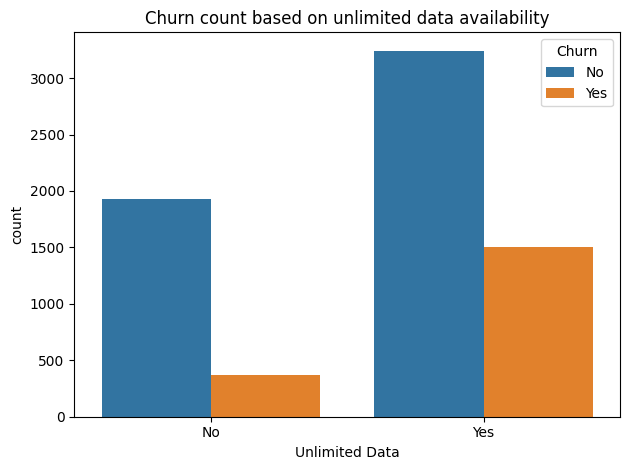

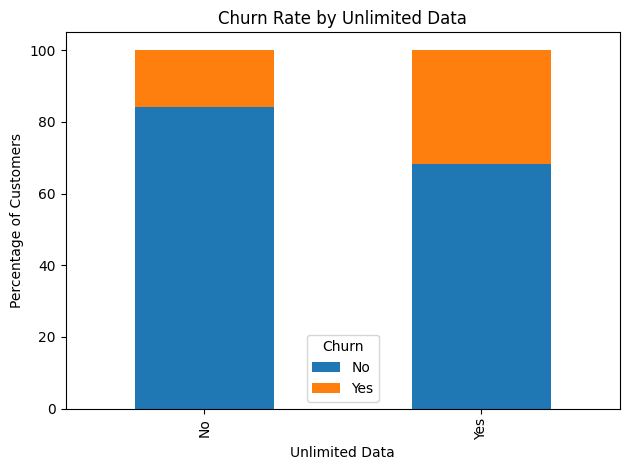

In [8]:
# ulimited data vs churn
unlimited_data_count = df.groupby('Unlimited Data')['Churn'].value_counts()
unlimited_data_count = unlimited_data_count.to_frame().reset_index()
print(unlimited_data_count)

sns.barplot(data=unlimited_data_count,x="Unlimited Data", y="count", hue="Churn")
plt.title("Churn count based on unlimited data availability")
plt.tight_layout()
plt.show()

unlimited_data_rate = df.groupby('Unlimited Data')['Churn'].value_counts(normalize=True).unstack() * 100
unlimited_data_rate.plot(kind='bar', stacked=True)
plt.title("Churn Rate by Unlimited Data")
plt.ylabel("Percentage of Customers")
plt.tight_layout()
plt.show()


 ## 🔧 Preparing the Dataset for Modeling

- **Dropped irrelevant/leaky columns** (`Lat Long`, `Latitude`, `Longitude`, `Churn Reason`, `Count`, `churn_rate`, `Churn Score`, `Churn Score.1`, `Churn Category`, `Customer Status`) to avoid data leakage and reduce noise.
- **Converted binary categorical features** (`Churn`, `gender`, `Partner`, `Married`, `Dependents`) to numeric (1/0) so they can be used by machine learning algorithms.
- **One‑hot encoded** all remaining low‑cardinality `object` columns to turn them into dummy variables.
- **Cleaned `TotalCharges`** by coercing to numeric and filling missing values with 0.



In [9]:
# dropping useless variables
df.drop(['Lat Long','Latitude','Longitude','Churn Reason','Count','churn_rate','Churn Score','Churn Score.1','Churn Category','Customer Status'],axis=1,inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges']=df['TotalCharges'].fillna(0)


In [10]:
# df.to_csv('telco_cleaned.csv', index=False)
# from google.colab import files
# files.download('telco_cleaned.csv')

In [11]:

df['Churn']=df['Churn'].map({'Yes':1, 'No':0})
df['gender']=df['gender'].map({'Male':0,'Female':1})
df['Partner']=df['Partner'].map({'Yes':1,'No':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Dependents']=df['Dependents'].map({'Yes':1,'No':0})

In [12]:
df.select_dtypes(include='object').nunique().sort_values(ascending=False)
object_cols = df.select_dtypes(include='object').columns
low_cardinality_vals = [col for col in object_cols if df[col].nunique()<30]
df = pd.get_dummies(data=df,columns=low_cardinality_vals,drop_first=True)

# df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# df['TotalCharges']=df['TotalCharges'].fillna(0)



## 🌱 Feature Matrix and Target Vector

- **X**: All numeric and boolean columns (after dropping `Churn`), representing our predictors.
- **y**: The `Churn` column (0 = stayed, 1 = churned), our target.

---

## 🚂 Train–Test Split

- Split the data into **70% training** and **30% testing** sets to evaluate out‑of‑sample performance.
- Used a fixed `random_state=42` for reproducibility.

---

## 🌳 Random Forest Modeling

- **Model**: `RandomForestClassifier` with 85 trees (`n_estimators=85`).
- **Training**: Fitted on the training set (`X_train`, `y_train`).
- **Prediction**: Generated churn predictions (`forest_pred`) on the test set.

---

## 🧮 Model Evaluation

- **Accuracy**: Measures overall correctness of predictions.
- **Confusion Matrix**: Breaks down true/false positives and negatives.
- **F1 Score**: Harmonic mean of precision and recall—especially useful for imbalanced classes.
- **Classification Report**: Detailed precision, recall, F1 for each class.

---

## 📊 Feature Importance

- Extracted `model.feature_importances_` to see which features had the greatest impact on churn prediction.
- Plotted the **top 20 features** to interpret model behavior and guide business actions.


Accuracy of the model: 0.96

Confusion Matrix:
 [[1509   16]
 [  77  511]] 

F1 Score 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1525
           1       0.97      0.87      0.92       588

    accuracy                           0.96      2113
   macro avg       0.96      0.93      0.94      2113
weighted avg       0.96      0.96      0.96      2113



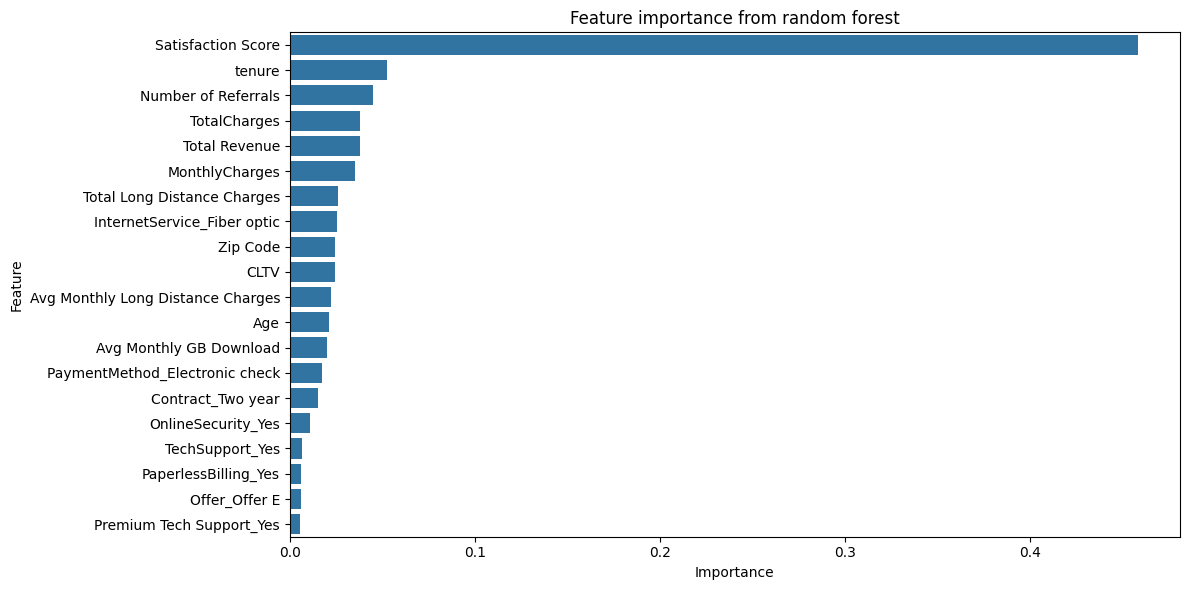

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

X = df.drop(['Churn'],axis=1).select_dtypes(include=['int64','float64','bool'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

rf_model = RandomForestClassifier(n_estimators=85,random_state=42)
rf_model.fit(X_train,y_train)

forest_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test,forest_pred)
cm = confusion_matrix(y_test, forest_pred)
f1 = f1_score(y_test,forest_pred)
cf = classification_report(y_test,forest_pred)
print(f"Accuracy of the model: {accuracy:.2f}\n")
print("Confusion Matrix:\n",cm,"\n")
print(f"F1 Score {f1:.2f}\n")
print("Classification Report:\n",cf)

# plot
importance = rf_model.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance',ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=feature_df.head(20),y="Feature",x="Importance")
plt.title('Feature importance from random forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## 🌱 Feature Matrix and Target Vector

- **X**: Selected all numeric (`int64`, `float64`) and boolean columns using `.select_dtypes()`, and dropped the `Churn` column.
- **y**: Used the `Churn` column as the target variable for classification (0 = stayed, 1 = churned).

---

## 🧼 Feature Scaling

- Applied `StandardScaler` to standardize numerical features.
- Scaling ensures features are on the same scale, which improves model convergence for Logistic Regression.

---

## 🚂 Train–Test Split

- Used `train_test_split()` to split the data:
  - 70% for training (`X_train`, `y_train`)
  - 30% for testing (`X_test`, `y_test`)
- `random_state=42` was used to ensure consistent results across runs.

---

## 🔁 Logistic Regression Modeling

- Initialized `LogisticRegression()` with `max_iter=1000` to avoid convergence warnings.
- Trained the model using `.fit()` on the scaled training data.
- Made predictions on the scaled test data using `.predict()`.

---

## 🧮 Model Evaluation

- Computed **Accuracy** using `accuracy_score()`.
- Generated a **Confusion Matrix** to visualize true/false positives and negatives.
- Used `classification_report()` to get precision, recall, and F1-score for each class.

---

## 📊 Coefficient Analysis

- Extracted feature coefficients using `model.coef_[0]` to interpret the model.
- Created a DataFrame with features and their respective coefficients.
- Sorted features by coefficient value to identify top contributors to churn.
- Visualized the **top 20 features with highest positive and also highest negative impact on churn** using a bar plot.

---


Accuracy score:0.95

Confusion Matrix:
 [[1470   55]
 [  57  531]] 

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1525
           1       0.91      0.90      0.90       588

    accuracy                           0.95      2113
   macro avg       0.93      0.93      0.93      2113
weighted avg       0.95      0.95      0.95      2113



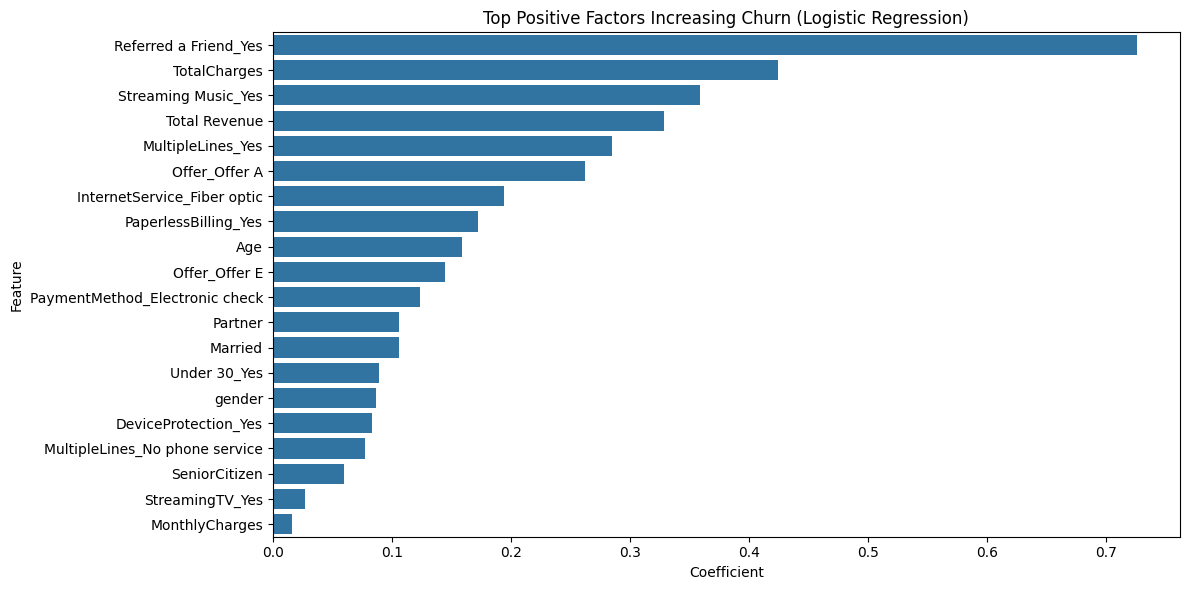

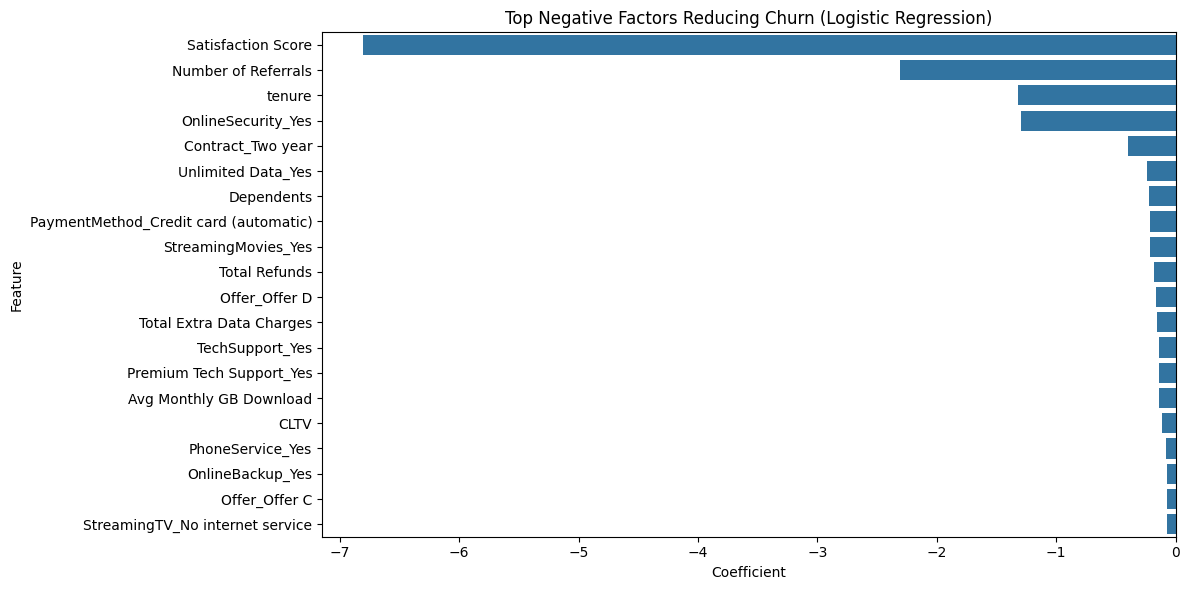

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = df.drop(['Churn'],axis=1).select_dtypes(include=['int64','float64','bool'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

Logistic_model = LogisticRegression(max_iter=1000)
Logistic_model = Logistic_model.fit(X_train_scaled,y_train)


logistic_pred = Logistic_model.predict(X_test_scaled)
Accuracy = accuracy_score(y_test, logistic_pred)
cm = confusion_matrix(y_test,logistic_pred)
cf = classification_report(y_test,logistic_pred)
print(f"Accuracy score:{Accuracy:.2f}\n")
print("Confusion Matrix:\n",cm,"\n")
print("Classification report:\n",cf)


coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': Logistic_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)


neg_coefficients = coefficients.sort_values(by='Coefficient',ascending=True)

plt.figure(figsize=(12,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.head(20))
plt.title("Top Positive Factors Increasing Churn (Logistic Regression)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='Coefficient', y='Feature', data=neg_coefficients.head(20))
plt.title("Top Negative Factors Reducing Churn (Logistic Regression)")
plt.tight_layout()
plt.show()


Logistic Regression AUC: 0.99
Random Forest AUC: 0.98


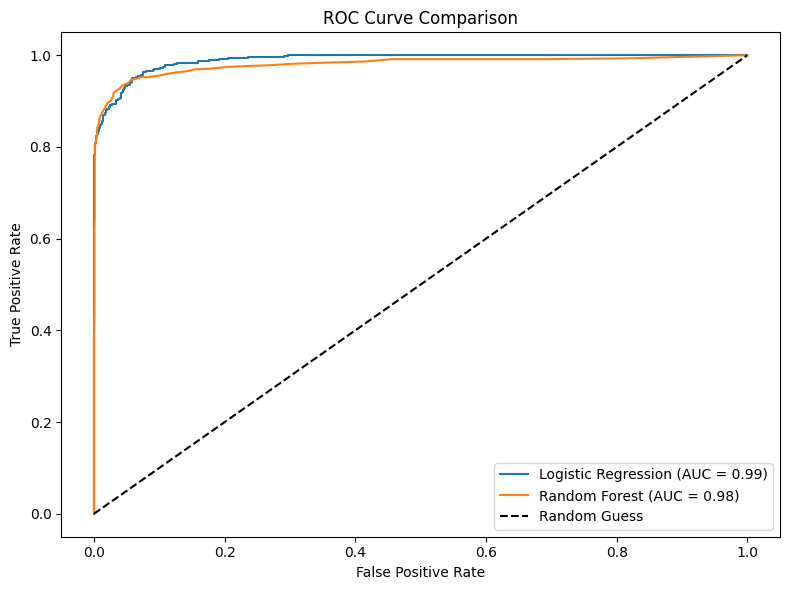

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve

logistic_probs = Logistic_model.predict_proba(X_test_scaled)[:,1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

logistic_auc = roc_auc_score(y_test, logistic_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

print(f"Logistic Regression AUC: {logistic_auc:.2f}")
print(f"Random Forest AUC: {rf_auc:.2f}")


# Get ROC curves
log_fpr, log_tpr, _ = roc_curve(y_test, logistic_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Plot
plt.figure(figsize=(8,6))
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0,1],[0,1],'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
# df.to_csv('telco_cleaned.csv', index=False)
# from google.colab import files
# files.download('telco_cleaned.csv')
